In [11]:
import math
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage import filters
import cv2

In [28]:
import tempfile
import IPython

def viewimage(im, normalize=True,titre='',displayfilename=False):
    imin=im.copy().astype(np.float32)
    if normalize:
        imin-=imin.min()
        if imin.max()>0:
            imin/=imin.max()
    else:
        imin=imin.clip(0,255)/255
    imin=(imin*255).astype(np.uint8)
    filename=tempfile.mktemp(titre+'.png')
    if displayfilename:
        print (filename)
    plt.imsave(filename, imin, cmap='gray')
    IPython.display.display(IPython.display.Image(filename))

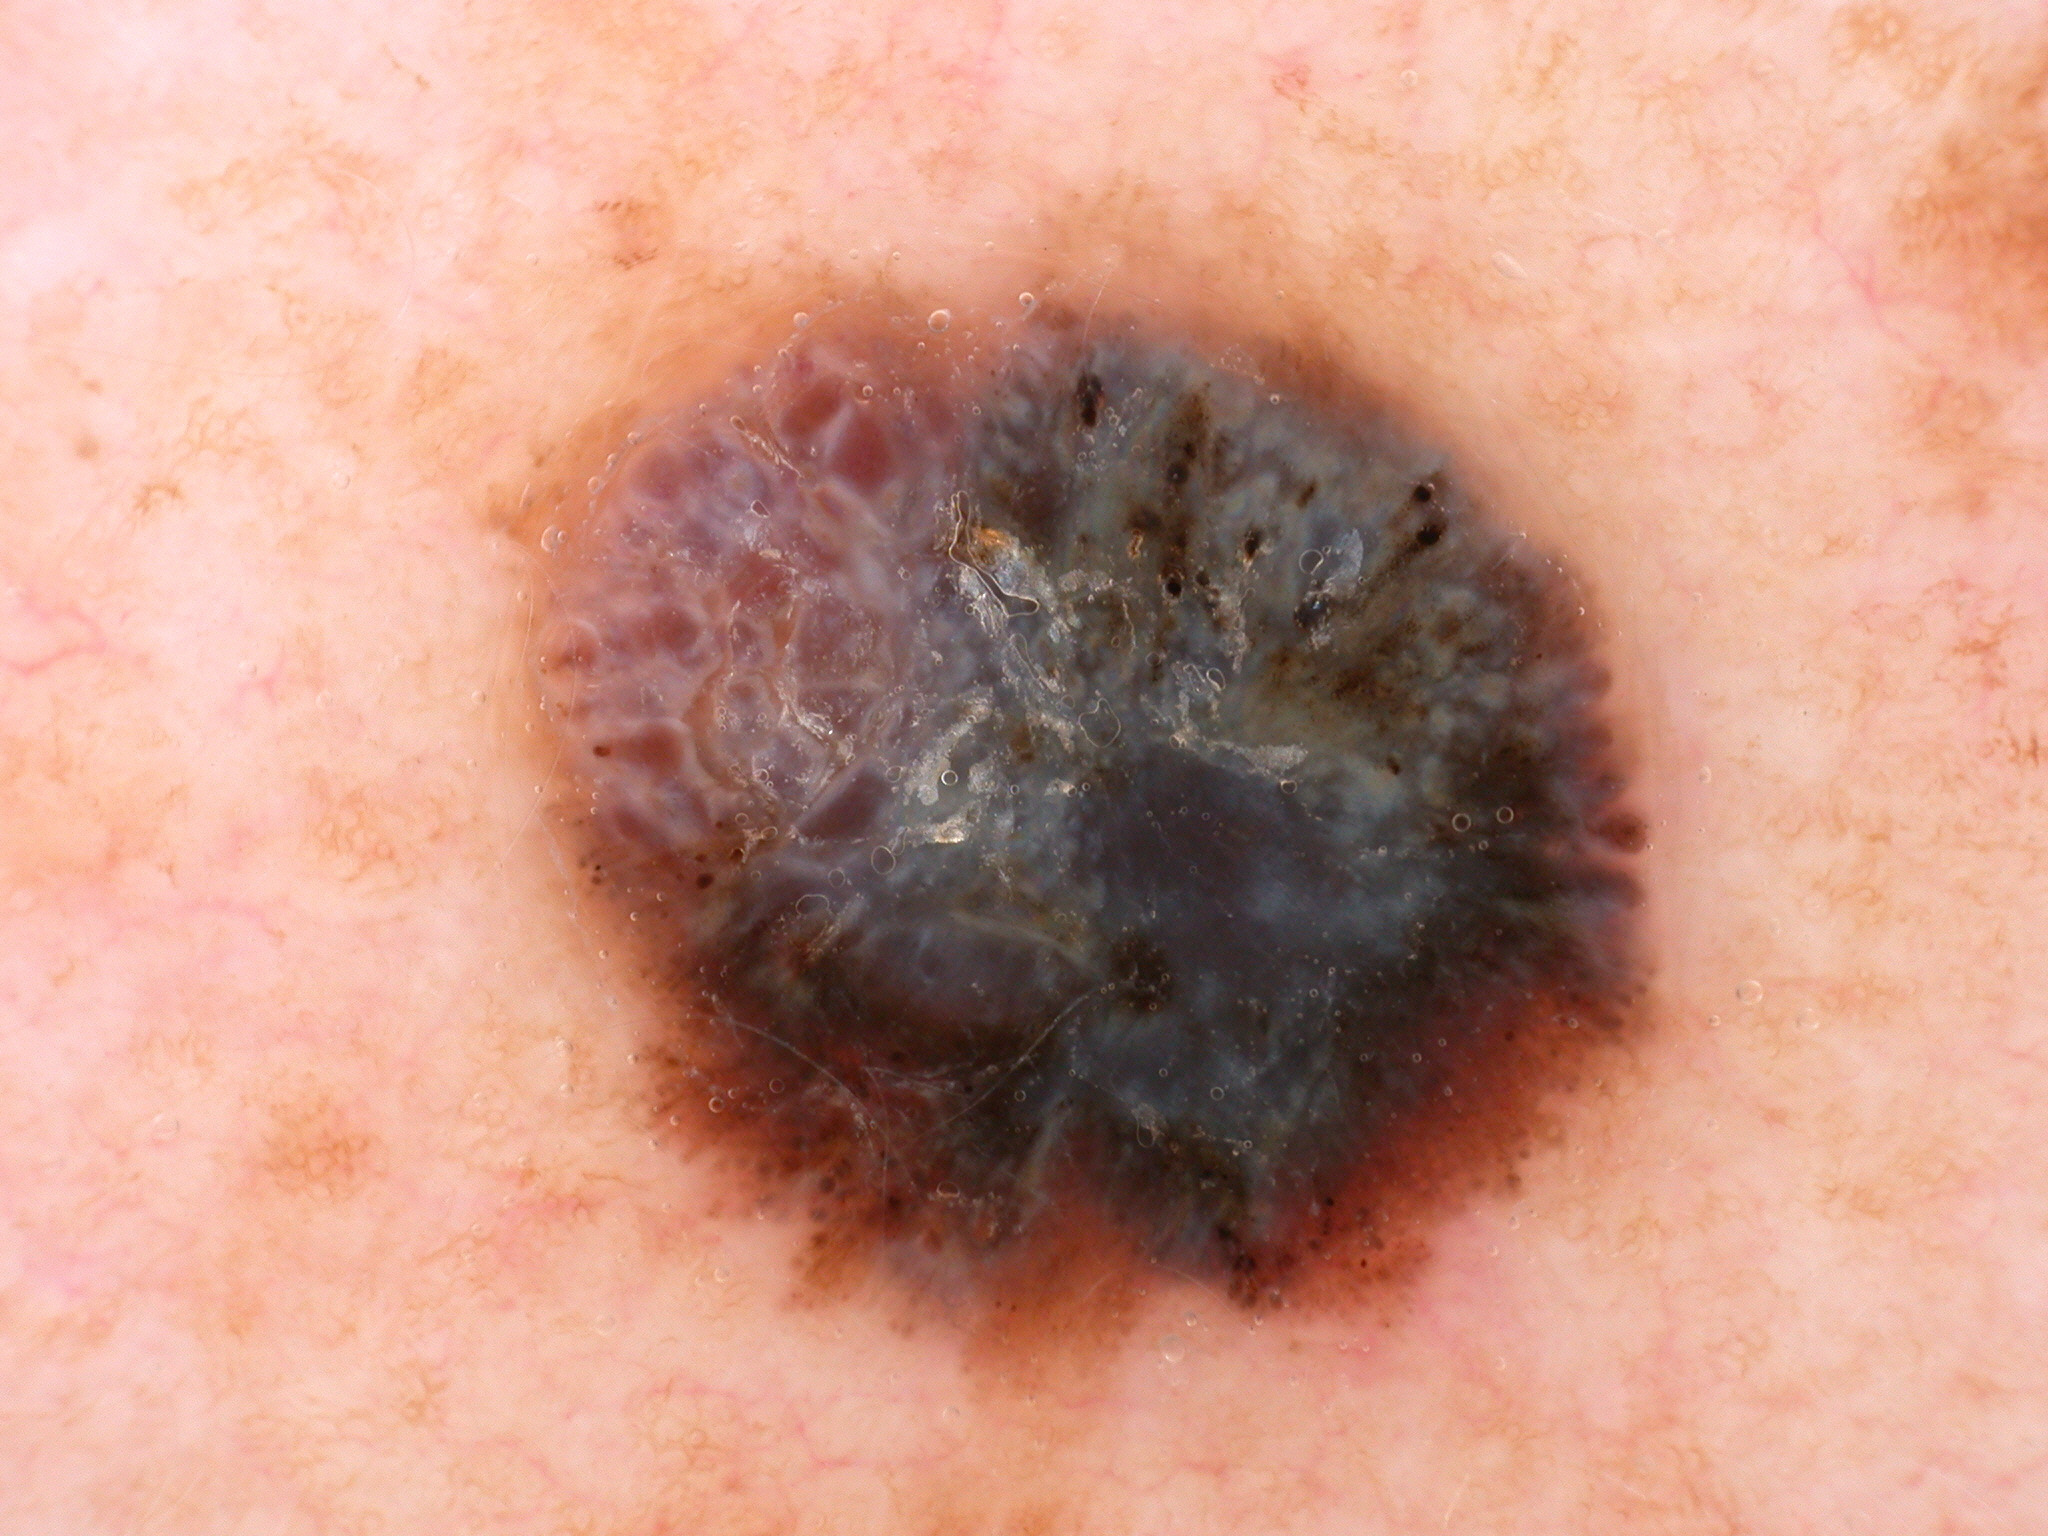

In [29]:
FilePath = "/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA201/Projet/ima201-skinlesions-billykaeppelin/skin_lesion_dataset-master/melanoma"
FileName = "/ISIC_0000142.jpg"
im=io.imread(FilePath+FileName)
viewimage(im)

In [33]:
#Définition des fonctions de ségmentations
def sobelGradX(ima):
    nl,nc=ima.shape
    gradx=np.zeros((nl,nc))
    for i in range(1,nl-1):
        for j in range(1,nc-1):
            gradx[i,j]=ima[i-1,j+1]+2*ima[i,j+1]+ima[i+1,j+1]-ima[i-1,j-1]-2*ima[i,j-1]-ima[i+1,j-1];         
    return gradx

def sobelGradY(ima):
    nl,nc=ima.shape
    grady=np.zeros((nl,nc))
    for i in range(1,nl-1):
        for j in range(1,nc-1):
            grady[i,j]=ima[i+1,j-1]+2*ima[i+1,j]+ima[i+1,j+1]-ima[i-1,j-1]-2*ima[i-1,j]-ima[i-1,j+1];
    return grady

def normeGradient(gradx,grady):
    nl,nc=gradx.shape
    norme=np.zeros((nl,nc))
    for i in range(nl):
        for j in range(nc):
            norme[i,j]=np.sqrt(gradx[i,j]*gradx[i,j]+grady[i,j]*grady[i,j])
    return norme

def maximaDirectionGradient(gradx,grady):
    nl,nc=gradx.shape
    norme=np.sqrt(gradx*gradx+grady*grady)+0.1
    gradx=np.divide(gradx,norme)
    grady=np.divide(grady,norme)
    contours=np.zeros((nl,nc),dtype=int);
    for i in range(1,nl-1):
        for j in range(1,nc-1):
            G1=interpolationbilineaire(norme,i+grady[i,j],j+gradx[i,j]); 
            G2=interpolationbilineaire(norme,i-grady[i,j],j-gradx[i,j]); 
            if norme[i,j]>=G1 and norme[i,j]>=G2:
                contours[i,j]=1
            else:
                contours[i,j]=0
    return contours

sigma=0
seuilnorme=0.2
def sobel(ima,sigma=0,seuilnorme=0.2):
    #Filtre Passe-Bas
    gfima=filters.gaussian(ima,sigma)
    #Gradients
    gradx=sobelGradX(gfima)
    grady=sobelGradY(gfima) 
    #Norme
    norme=np.sqrt(gradx*gradx+grady*grady)
    #Direction
    direction=np.arctan2(grady,gradx)
    #Norme Seuillée
    contoursnorme =(norme>seuilnorme) 
    #Maxima du gradient dans la direction du gradient
    contours=np.uint8(maximaDirectionGradient(gradx,grady))
    #Contours
    valcontours=(norme>seuilnorme)*contours
    
    #Affichage
    plt.figure('Image originale')
    plt.imshow(ima, cmap='gray')
    plt.figure('Image filtrée (passe-bas)')
    plt.imshow(gfima, cmap='gray')
    plt.figure('Gradient horizontal')
    plt.imshow(gradx, cmap='gray')
    plt.figure('Gradient vertical')
    plt.imshow(grady, cmap='gray')    
    plt.figure('Norme du gradient')
    plt.imshow(norme, cmap='gray')
    plt.figure('Direction du Gradient')
    plt.imshow(direction, cmap='gray')
    plt.figure('Norme seuillée')
    plt.imshow(255*contoursnorme)
    plt.figure('Maxima du gradient dans la direction du gradient')
    plt.imshow(255*contours)      
    plt.figure()
    plt.imshow(255*valcontours)
    plt.show()


In [34]:
gray_image = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
sobel(gray_image)

NameError: name 'interpolationbilineaire' is not defined

In [ ]:
im.shape

(2048, 3)